Milestone 1:

from https://ubc-dsci.github.io/dsci-310-student/milestone1.html

1. Draft a team work contract
2. Set-up a public GitHub repository (or a private one, adding ttimbers and GiuseppeTT as collaborators with read access) under the DSCI-310 organization
3. Select a data analysis project to work with
4. Create an appropriate file and directory structure for a data analysis project

    - fill in md files
    - Dockerfile
    - .github/workflows/publish_docker_image.yml


5. Add the data analysis as a literate code document
6. Make the computation environment reproducible through containerization with Docker


part 5 here:

-----------------------------

<h1> Title </h1>

<h3> Summary: </h3>

<h3> Introduction: </h3>
- provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
- clearly state the question you tried to answer with your project
- identify and describe the dataset that was used to answer the question

<h3> Methods & Results: </h3>
- describe in written english the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.
- your report should include code which:
- loads data from the original source on the web
- wrangles and cleans the data from it’s original (downloaded) format to the format necessary for the planned classification or clustering analysis
- performs a summary of the data set that is relevant for exploratory data analysis related to the planned classification analysis
- creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned classification analysis
- performs classification or regression analysis
- creates a visualization of the result of the analysis
- note: all tables and figure should have a figure/table number and a legend

<h3> Discussion: </h3>
- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

<h3> References: </h3>
- at least 4 citations relevant to the project (format is your choose, just be consistent across the references).

--------------------

<h2> Code:

<h4> Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h4> Data </h4>

Data from https://archive-beta.ics.uci.edu/ml/datasets/census+income

In [25]:
# add script to download the data automatically,
# probably too much work to get names from names file

data = pd.read_csv('data/adult.data', header=None)

names = ['age',
        'workclass',
        'fnlwgt',
        'education',
        'education-num',
        'marital-status',
        'occupation',
        'relationship',
        'race',
        'sex',
        'capital-gain',
        'capital-loss',
        'hours-per-week',
        'native-country',
        'income']

data.columns = names

data['income_bool'] = data['income'] == " <=50K"
data['income_bool'] = data['income_bool'].astype(int)

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_bool
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1


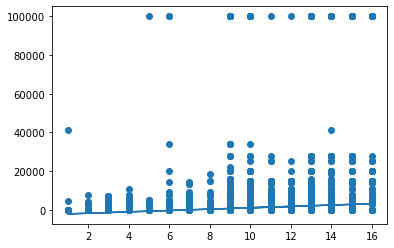

In [39]:
ed = data['education-num']
gains = data['capital-gain']

m, b = np.polyfit(ed, gains, 1)

plt.scatter(ed,gains)
plt.plot(ed, m*ed+b)